In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
"""
chunk_size=20000
batch_no=1
for chunk in pd.read_csv('data_100000.csv',chunksize=chunk_size):
    chunk.to_csv('traffic_data'+str(batch_no)+'.csv',index=False)
    batch_no+=1
traffic2=pd.read_csv('traffic_data1.csv',sep=',')    
print(traffic2.head(10))
"""

In [285]:
traffic1=pd.read_csv('data_100000.csv')# read csv file

In [286]:
#find for null values in all columns
null_cols=traffic1.columns[traffic1.isnull().any()]

In [287]:
#delete unneccesary columns
for col in null_cols:
    if (traffic1[col].isnull().sum()*100)/traffic1.shape[0]>=80:
        print(col, traffic1[col].isnull().sum())
        traffic1.drop(col,inplace=True,axis=1)

contributing_factor_vehicle_3 91239
contributing_factor_vehicle_4 97760
contributing_factor_vehicle_5 99333
vehicle_type_code_3 91671
vehicle_type_code_4 97853
vehicle_type_code_5 99354


In [288]:
#convert date format from string to datetime64 
traffic1.crash_date=pd.to_datetime(traffic1['crash_date'])

In [289]:
#drop all duplicates
traffic1.drop_duplicates()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2017-04-18,23:10,STATEN ISLAND,10312.0,40.536728,-74.193344,"(40.536728, -74.193344)",NaN,NaN,243 DARLINGTON AVENUE,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3654181,Station Wagon/Sport Utility Vehicle,NaN
1,2017-05-06,13:00,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,...,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,3665311,Sedan,NaN
2,2017-04-27,17:15,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3658491,Sedan,Sedan
3,2017-05-09,20:10,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,...,0,0,0,1,0,Unspecified,Unspecified,3666554,Motorcycle,Sedan
4,2017-04-18,14:00,BRONX,10456.0,40.828846,-73.903120,"(40.828846, -73.90312)",NaN,NaN,1167 BOSTON ROAD,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3653269,Sedan,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2019-11-20,15:00,BROOKLYN,11210.0,40.618893,-73.946420,"(40.618893, -73.94642)",NaN,NaN,1314 EAST 29 STREET,...,0,0,0,0,0,Unspecified,NaN,4244961,Station Wagon/Sport Utility Vehicle,NaN
99996,2019-12-01,11:22,QUEENS,11367.0,40.723380,-73.814750,"(40.72338, -73.81475)",NaN,NaN,150-62 76 ROAD,...,0,0,0,0,0,Unspecified,Unspecified,4250093,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
99997,2019-11-21,21:30,BROOKLYN,11249.0,40.710820,-73.968530,"(40.71082, -73.96853)",BROADWAY,KENT AVENUE,NaN,...,0,0,0,0,0,Passing Too Closely,Unspecified,4245290,Sedan,Box Truck
99998,2019-11-18,17:28,BROOKLYN,11234.0,40.631180,-73.928185,"(40.63118, -73.928185)",NaN,NaN,1695 UTICA AVENUE,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4243646,Sedan,Bus


In [290]:
# process crash time attribute
def process_crash_time():

    # convert crash time object to category
    traffic1['crash_time'] = traffic1['crash_time'].astype('category')
    return traffic1['crash_time']


def process_borough():

    # convert crash time object to category
    traffic1['borough'] = traffic1['borough'].astype('category')
    return traffic1['borough']


def process_zip_code():

    # convert crash time object to category
    traffic1['zip_code'] = traffic1['zip_code'].astype('Int64')
    return traffic1['crash_time']


def process_on_street_name():

    # convert crash time object to category
    traffic1['on_street_name'] = traffic1['on_street_name'].astype('category')
    return traffic1['on_street_name']


def process_off_street_name():

    # convert crash time object to category
    traffic1['off_street_name'] = traffic1['off_street_name'].astype('category')
    return traffic1['off_street_name']


def process_on_street_name():

    # convert crash time object to category
    traffic1['cross_street_name'] = traffic1['cross_street_name'].astype(
        'category')
    return traffic1['cross_street_name']

def process_contributing_factor_vehicle_1():
    # split the string by "/" and get first item in the list
    traffic1['collision_factor1']=traffic1['contributing_factor_vehicle_1'].str.lower().str.split('/').str.get(0)
    traffic1['collision_factor1']=traffic1['collision_factor1'].astype('category')
    return traffic1['collision_factor1']
                                                     
def process_contributing_factor_vehicle_2():
    # split the string by "/" and get first item in the list
    traffic1['collision_factor2']=traffic1['contributing_factor_vehicle_2'].str.lower().str.split('/').str.get(0)
    traffic1['collision_factor2']=traffic1['collision_factor2'].astype('category')
    return traffic1['collision_factor2']

def process_vehicle_type_code1():
    # split the string by "/" and get first item in the list
    traffic1['vehicle1']=traffic1['vehicle_type_code1'].str.lower().str.split('/').str.get(0)
    traffic1['vehicle1']=traffic1['vehicle1'].fillna('not a string')
    traffic1['vehicle1'].str.lower().unique()
    traffic1['vehicle1']=traffic1['vehicle1'].astype('category')
    return traffic1['vehicle1']

def process_vehicle_type_code2():
    # split the string by "/" and get first item in the list
    traffic1['vehicle2']=traffic1['vehicle_type_code2'].str.lower().str.split('/').str.get(0)
    traffic1['vehicle2']=traffic1['vehicle2'].fillna('not a string')
    traffic1['vehicle2'].str.lower().unique()
    traffic1['vehicle2']=traffic1['vehicle2'].astype('category')
    return traffic1['vehicle2']

In [291]:
#call function 
traffic1['crash_time']=process_crash_time()
traffic1['borough']=process_borough()
traffic1['zip_code']=process_zip_code ()
traffic1['on_street_name']=process_on_street_name()
traffic1['off_street_name']=process_off_street_name()
traffic1['cross_street_name']=process_on_street_name()
traffic1['collision_factor1']=process_contributing_factor_vehicle_1()
traffic1['collision_factor2']=process_contributing_factor_vehicle_2()
traffic1['vehicle1']=process_vehicle_type_code1()
traffic1['vehicle2']=process_vehicle_type_code2()

In [292]:
#create a dataframe for collision data
collision_data=traffic1[['collision_id','crash_date','borough','collision_factor1','collision_factor2']]

In [293]:
#create dataframe for streets
collision_by_street=traffic1[['collision_id','on_street_name','off_street_name','cross_street_name']]

In [294]:
#create dataframe for vehicles
collision_by_vehicle=traffic1[['collision_id','vehicle1','vehicle2']]

In [295]:
#create dataframe for fatalities
fatalities=traffic1[['collision_id','number_of_persons_injured','number_of_persons_killed',
                    'number_of_pedestrians_injured','number_of_pedestrians_killed',
                    'number_of_cyclist_injured','number_of_cyclist_killed',
                    'number_of_motorist_injured','number_of_motorist_killed']]

In [297]:
#convert category data to string
collision_data['collision_factor1']=collision_data['collision_factor1'].astype('string')
collision_data['collision_factor2']=collision_data['collision_factor2'].astype('string')
collision_data['borough']=collision_data['borough'].astype('string')

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [299]:
#fill nan values by -999
collision_data.fillna('-999',inplace=True)

/home/becode/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [300]:
#convert categorical data from string to category type
collision_data['collision_factor1']=collision_data['collision_factor1'].astype('category')
collision_data['collision_factor2']=collision_data['collision_factor2'].astype('category')
collision_data['borough']=collision_data['borough'].astype('category')

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [303]:
#extract data for year,month, day
collision_data['year']=collision_data['crash_date'].dt.year
collision_data['month']=collision_data['crash_date'].dt.month
collision_data['day']=collision_data['crash_date'].dt.day

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

## Number of accidents by Year

In [306]:
#give total number of accidents per year
collision_occurs_by_year=collision_data.groupby('year')['collision_factor1'].count()

In [307]:
#sort values in descending order
collision_occurs_by_year.sort_values(ascending=False)

year
2020    50037
2019    43881
2017     5871
2018      148
2015       43
2013       19
2014        1
Name: collision_factor1, dtype: int64

## Reasons for occurance of accidents 

In [308]:
#join dataframes
df_merge=collision_data.merge(collision_by_vehicle,left_on='collision_id',right_on='collision_id',how='left')

In [309]:
#due to which vehicle and reason the accidents are happening
coll_reas=df_merge.groupby('year')['collision_factor1','vehicle1'].max()
coll_reas=coll_reas.sort_values(by='year',ascending=False)

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [310]:
#due to 'view obstruction' and 'work van' in 2020, the accidents have been occuring
coll_reas

,collision_factor1,vehicle1
year,,
2020,view obstructed,work van
2019,windshield inadequate,wineb
2018,view obstructed,van
2017,view obstructed,winne
2015,unspecified,van
2014,unspecified,other
2013,unspecified,van


In [311]:
collision_data['year']=collision_data['year'].astype('Int64')

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [327]:
final_data=final_data.replace('-999',np.nan)

In [328]:
collision_data=collision_data.replace('-999',np.nan)

## Brooklyn region is most affected with accidents

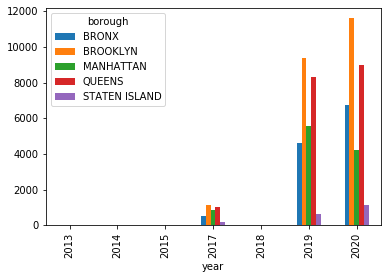

In [329]:
collision_data.pivot_table(index='year',columns='borough',
                           aggfunc='size').plot(kind='bar')

##  Driver inattention and unspecified are the causes for most accidents

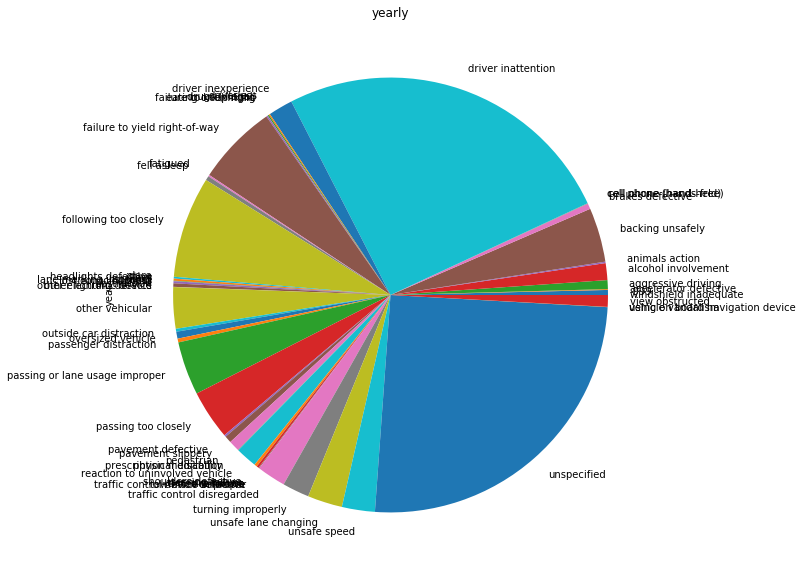

In [313]:
# reason for accidents per year based on collision factor
df_merge.groupby('collision_factor1')['year'].agg(lambda x: sum(x)).plot(kind='pie',title='yearly',figsize=(10,10))


In [314]:
#merging fatalities dataframe and created final data
final_data=df_merge.merge(fatalities,left_on='collision_id',right_on='collision_id',how='left')

## Most affected Borough with different fatalities

In [330]:
total_fatal=final_data.groupby('borough')['number_of_persons_injured','number_of_persons_killed',
                                          'number_of_pedestrians_injured','number_of_pedestrians_killed',
                                          'number_of_cyclist_injured','number_of_cyclist_killed',
                                          'number_of_motorist_injured','number_of_motorist_killed'].agg(['max','sum','min'])

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [331]:
total_fatal

number_of_persons_injured           number_of_persons_killed  \
                                    max   sum min                      max   
borough                                                                      
BRONX                                10  4209   0                        1   
BROOKLYN                             15  8137   0                        3   
MANHATTAN                             7  3053   0                        1   
QUEENS                               11  6086   0                        1   
STATEN ISLAND                         9   804   0                        1   

                      number_of_pedestrians_injured            \
              sum min                           max   sum min   
borough                                                         
BRONX          15   0                             6   699   0   
BROOKLYN       37   0                             3  1290   0   
MANHATTAN      17   0                             5   651   0   
QUEENS         30   0                             6   839   0   
STATEN ISLAND   5   0                             2    90   0   

              number_of_pedestrians_killed  ... number_of_cyclist_injured  \
                                       max  ...                       min   
borough                                     ...                             
BRONX                                    1  ...                         0   
BROOKLYN                                 1  ...                         0   
MANHATTAN                                1  ...                         0   
QUEENS                                   1  ...                         0   
STATEN ISLAND                            0  ...                         0   

              number_of_cyclist_killed         number_of_motorist_injured  \
                                   max sum min                        max   
borough                                                                     
BRONX                                1   3   0                         10   
BROOKLYN                             1   9   0                         15   
MANHATTAN                            1   3   0                          6   
QUEENS                               1   1   0                         11   
STATEN ISLAND                        1   1   0                          9   

                        number_of_motorist_killed          
                sum min                       max sum min  
borough                                                    
BRONX          2972   0                         1   8   0  
BROOKLYN       5450   0                         3  18   0  
MANHATTAN      1561   0                         1   4   0  
QUEENS         4504   0                         1  15   0  
STATEN ISLAND   667   0                         1   4   0  

[5 rows x 24 columns]

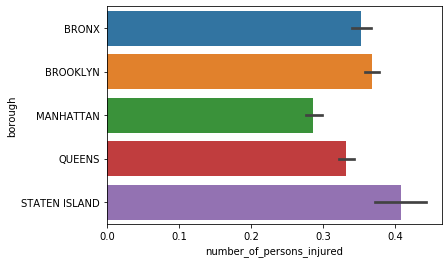

In [318]:
#barplot to find number of persions injured in each borough
sns.barplot(x='number_of_persons_injured',y='borough',data=final_data)

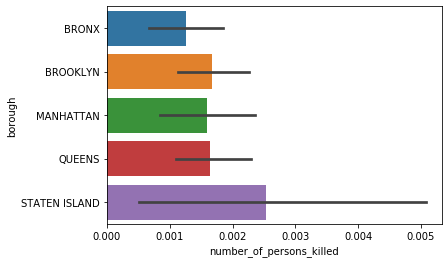

In [319]:
#barplot to find number of persions killed in each borough
sns.barplot(x='number_of_persons_killed',y='borough',data=final_data)

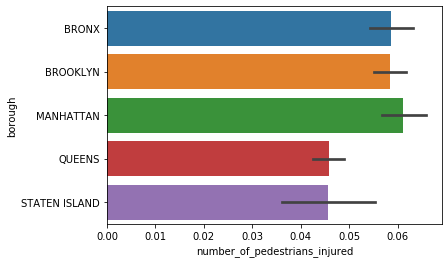

In [320]:
#barplot to find number of pedestrians injured in each borough

sns.barplot(x='number_of_pedestrians_injured',y='borough',data=final_data)

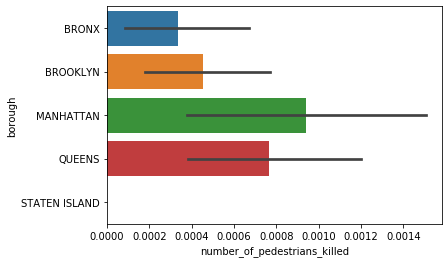

In [321]:
#barplot to find number of pedestrians killed in each borough
sns.barplot(x='number_of_pedestrians_killed',y='borough',data=final_data)

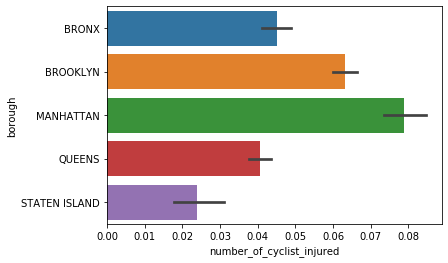

In [322]:
#barplot to find number of cyclist injured in each borough
sns.barplot(x='number_of_cyclist_injured',y='borough',data=final_data)

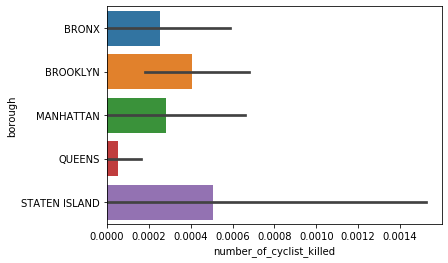

In [323]:
#barplot to find number of cyclist killed in each borough
sns.barplot(x='number_of_cyclist_killed',y='borough',data=final_data)

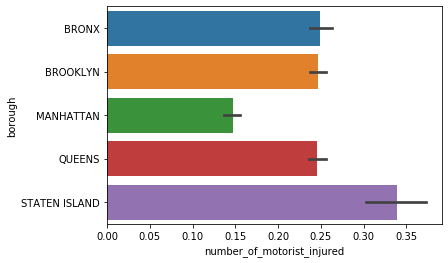

In [324]:
#barplot to find number of motorist injured in each borough
sns.barplot(x='number_of_motorist_injured',y='borough',data=final_data)

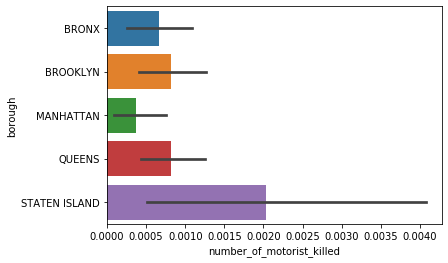

In [325]:
#barplot to find number of motorist killed in each borough
sns.barplot(x='number_of_motorist_killed',y='borough',data=final_data)

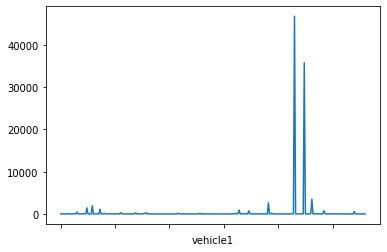

In [326]:
#most affected vehicle
final_data.groupby('vehicle1')['vehicle1'].agg('count').plot(kind='line')

In [28]:
categories=['station wagon','sedan','motorcycle','taxi','pick-up truck',
            'ambulance','tractor truck diesel','bus','nan','box truck',
            'bike','deliv','van','tower','pas','tanker','flat bed','convertible',
            'motorscooter','moped','e-350','passenger vehicle','rv',
            'sport utility','garbage or refuse','chassis cab','self','concrete mixer',
            'tractor truck gasoline','2 dr sedan','tow truck','beverage truck','flat rack',
            'carry all','motorbike','refg','4 dr sedan','bulk agriculture','pk','posta',
            'tract','e-bike','delv','amb','mack','lift boom','3-door','small com veh(4 tires)',
            'winne','ambul','p','dump','refrigerated van','bobca',
            'school bus','truck','armored truck','unkno','white',
            'com','4d','box t','e-scooter','fire','util','ladder 34',
            '4ds','van camper','e-sco','golf','stake or rack','e-bik',
            'cont','ltr','scoot','forkl','motorized home','const','trail',
            'other','limo','parce','open body','ut','city','van t',
            'picku','fdny','vespa','comme','pu','pickup with mounted camper',
            'boxtr','backh','cat','ambu','wineb','polic','hi ta','e bik','prks',
            'lunch wagon','pick-','tow truck']

In [29]:
for word in categories:
    matches=process.extract(word,traffic1['vehicle_type_code1'],limit=traffic1['vehicle_type_code1'].shape[0])
    for potential_matches in matches:
        if potential_matches[1]>90:
            match_veh=traffic1['vehicle_type_code1']==potential_matches[0]
            traffic1.loc[match_veh,'vehicle_type_code1']=word
    print(traffic1['vehicle_type_code1'].unique())    
    

[station wagon, sedan, motorcycle, taxi, pick-up truck, ..., e bik, prks, lunch wagon, pick-, tow truck]
Length: 104
Categories (104, object): [station wagon, sedan, motorcycle, taxi, ..., prks, lunch wagon, pick-, tow truck]
[station wagon, sedan, motorcycle, taxi, pick-up truck, ..., e bik, prks, lunch wagon, pick-, tow truck]
Length: 104
Categories (104, object): [station wagon, sedan, motorcycle, taxi, ..., prks, lunch wagon, pick-, tow truck]
[station wagon, sedan, motorcycle, taxi, pick-up truck, ..., e bik, prks, lunch wagon, pick-, tow truck]
Length: 104
Categories (104, object): [station wagon, sedan, motorcycle, taxi, ..., prks, lunch wagon, pick-, tow truck]
[station wagon, sedan, motorcycle, taxi, pick-up truck, ..., e bik, prks, lunch wagon, pick-, tow truck]
Length: 104
Categories (104, object): [station wagon, sedan, motorcycle, taxi, ..., prks, lunch wagon, pick-, tow truck]
[station wagon, sedan, motorcycle, taxi, pick-up truck, ..., e bik, prks, lunch wagon, pick-, to

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

(0, 100)

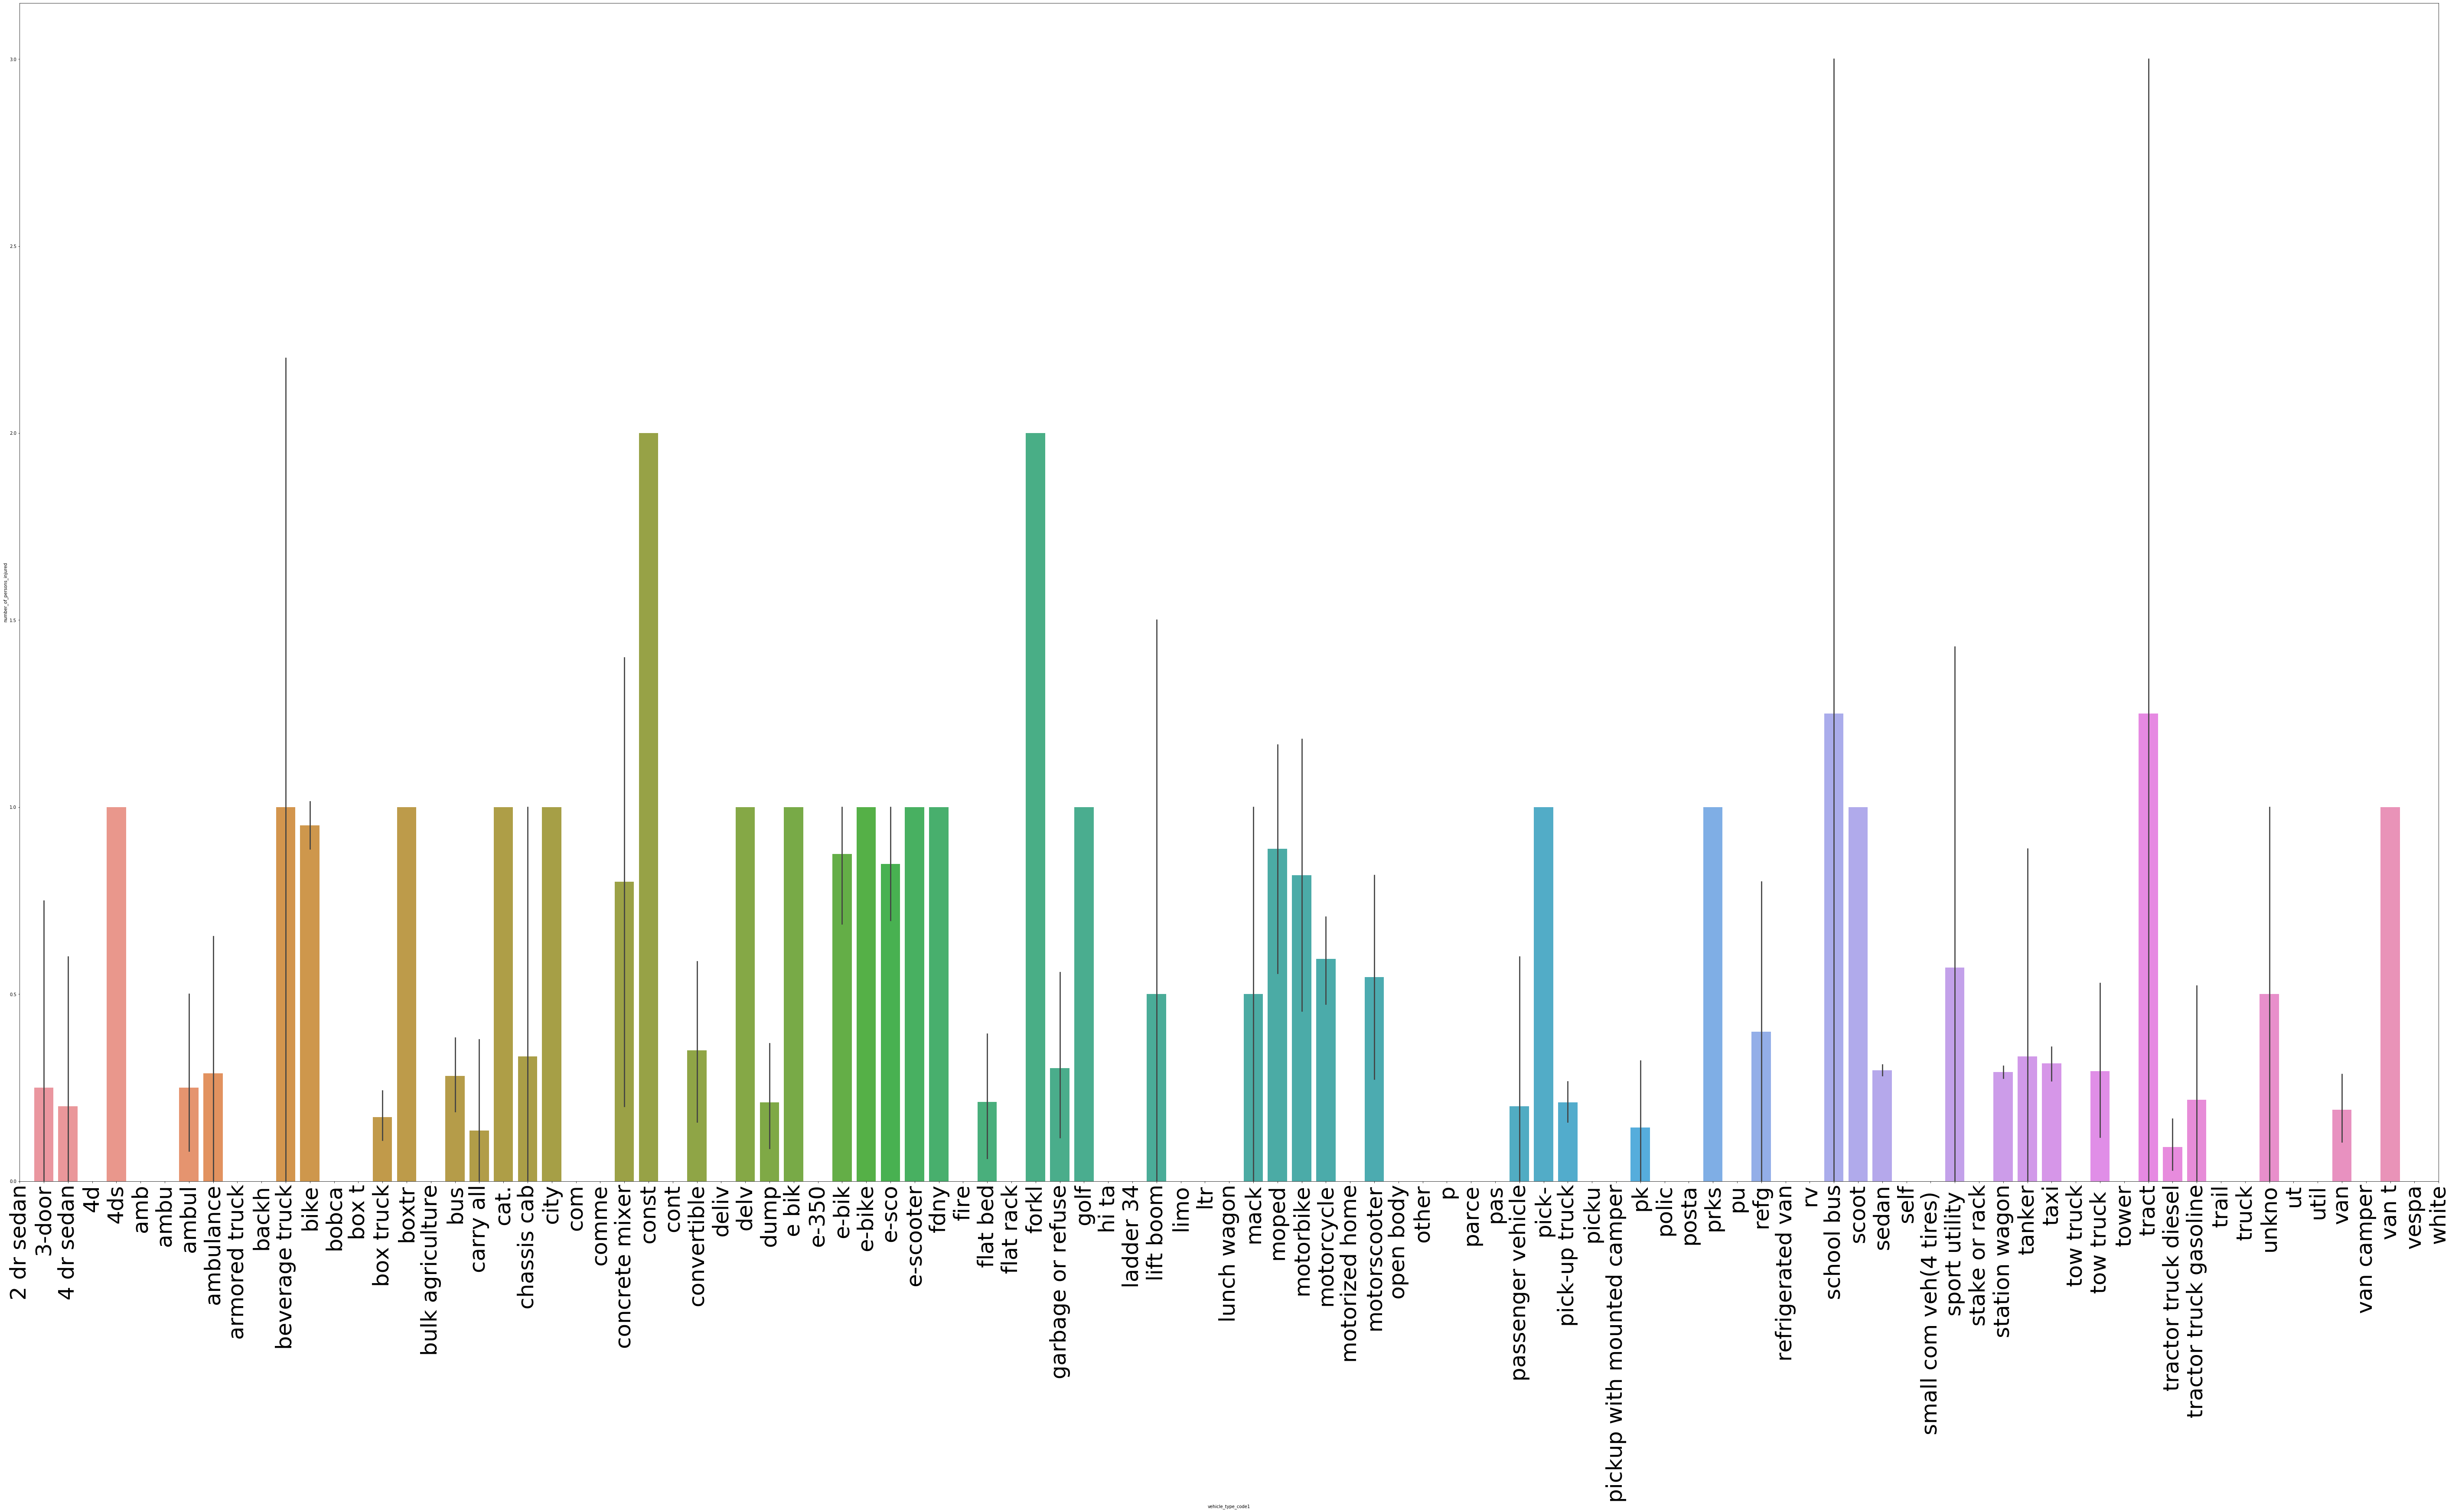

In [153]:
plt.figure(figsize=(100,50))
ax=sns.barplot(x='vehicle_type_code1',y='number_of_persons_injured',data=traffic1)
plt.xticks(rotation=90,fontsize = 50)
ax.set_xlim([0,100])


In [187]:
gdf = gpd.GeoDataFrame(traffic1, geometry=gpd.points_from_xy(traffic1.longitude, traffic1.latitude))

In [188]:
street_map = gpd.read_file('geo_export_d9084d32-d45c-44f4-ba9f-3d7542d3aa5a.shp')

In [199]:
# designate coordinate system
crs = {'init':'EPSG:3857'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(traffic1['longitude'], traffic1['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(traffic1,crs = crs,geometry = geometry)

/home/becode/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


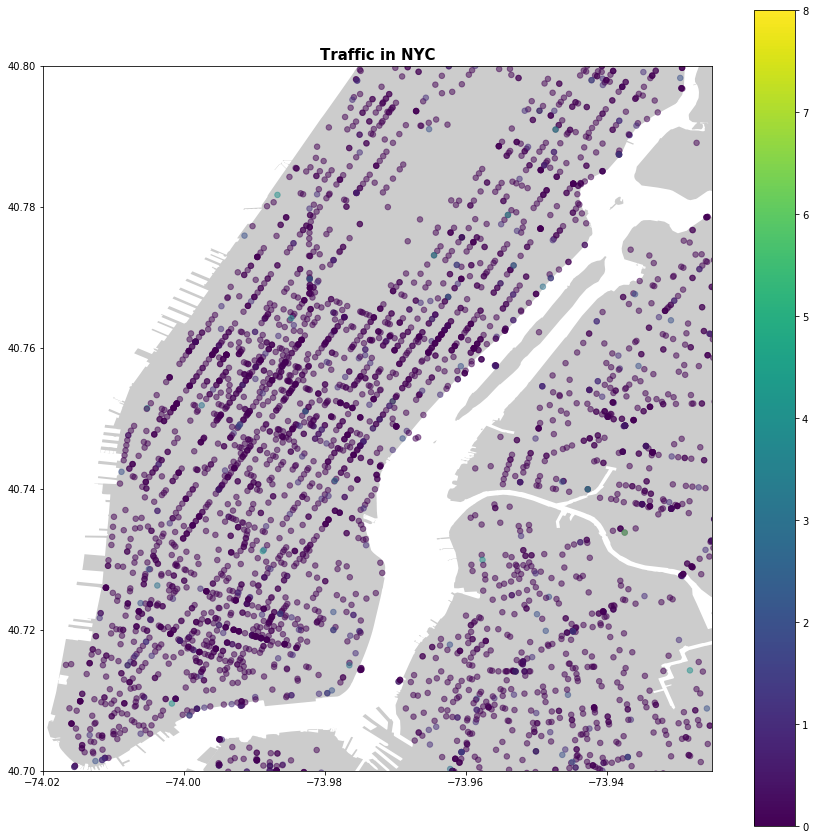

In [200]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='number_of_motorist_injured',ax=ax,alpha=0.5, legend=True,markersize=30)
# add title to graph
plt.title('Traffic in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

In [8]:
if __name__=='__main__':
    main()

                crash_date crash_time        borough  zip_code   latitude  \
0  2017-04-18T00:00:00.000      23:10  STATEN ISLAND   10312.0  40.536728   
1  2017-05-06T00:00:00.000      13:00          BRONX   10472.0  40.829052   
2  2017-04-27T00:00:00.000      17:15         QUEENS   11420.0  40.677303   
3  2017-05-09T00:00:00.000      20:10            NaN       NaN  40.624958   
4  2017-04-18T00:00:00.000      14:00          BRONX   10456.0  40.828846   
5  2017-05-08T00:00:00.000      10:33            NaN       NaN  40.556454   
6  2017-05-10T00:00:00.000       6:10            NaN       NaN  40.740025   
7  2017-04-24T00:00:00.000       9:30       BROOKLYN   11203.0  40.651646   
8  2017-04-14T00:00:00.000      13:00            NaN       NaN  40.751800   
9  2017-05-02T00:00:00.000       1:00          BRONX   10474.0  40.816864   

   longitude                 location                    on_street_name  \
0 -74.193344  (40.536728, -74.193344)                               NaN   
1 

In [35]:
traffic1.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'off_street_name',
       'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code1',
       'vehicle_type_code2'],
      dtype='object')